In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import RidgeClassifierCV,RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from time import time
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics,preprocessing
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [2]:
directory = os.fsencode('../data/')

location = True  #range location
mean_dopp = False  #mean of doppler spectrum
var_dopp = True  #variance of doppler spectrum, normalized by total power and square of number of bins
SPC_Hi = True  #scattering point cloud, high threshold
SPD = True #scattering point difference, high threshold
MDR = True #magnitude difference rate
strength = True #sum of doppler spectrum
max_dev = True #deviation from maximum in doppler spectrum (maybe same as var_dopp)
SPC_Lo = True #scattering point cloud, low threshold
peak_count = True #peak count
std_deviation = True #var_dopp difference rate
harmonic_power_content = True #power content of minor peaks in doppler spectrum
frame_counter = False #frame reference of each sample, just for visualization, not a feature
correlation = True
max_to_mean_distance = True
peak_strength_std = False
Lo_peak_count = True
Lo_harmonic_power_content = True
SPC_Mi = True
Lo_skewness = True
Lo_skewness_variation = True
Hi_deviation = True
Hi_deviation_difference = True
Mi_peak_count = True
Mi_harmonic_power_content = True
Mi_skewness = True
Mi_skewness_difference = True
Hi_skewness = True
Hi_skewness_difference = True
Lo_skewness_mean = True
Side_lobe_strength = True
Side_lobe_max_strength = True
SPC_Lo_skewness = True
SPC_Mi_Hi_skewness = True
SPC_Mi_variance = True



feature_list = {'location':location,'mean_dopp':mean_dopp,'var_dopp':var_dopp,'SPC_Hi':SPC_Hi,'SPD':SPD,\
                'MDR':MDR,'strength':strength,'max_dev':max_dev,'SPC_Lo':SPC_Lo,'peak_count':peak_count,\
               'std_deviation':std_deviation,'harmonic_power_content':harmonic_power_content,'frame_counter':frame_counter,\
                'correlation':correlation,'max_to_mean_distance':max_to_mean_distance,'peak_strength_std':peak_strength_std,\
                'Lo_peak_count':Lo_peak_count,'Lo_harmonic_power_content':Lo_harmonic_power_content,"SPC_Mi":SPC_Mi,"Lo_skewness":Lo_skewness,\
                "Lo_skewness_variation":Lo_skewness_variation,"Hi_deviation":Hi_deviation,"Hi_deviation_difference":Hi_deviation_difference,\
               'Mi_peak_count':Mi_peak_count,'Mi_harmonic_power_content':Mi_harmonic_power_content,'Mi_skewness':Mi_skewness,\
                'Mi_skewness_difference':Mi_skewness_difference,'Hi_skewness':Hi_skewness,'Hi_skewness_difference':Hi_skewness_difference,\
               'Lo_skewness_mean':Lo_skewness_mean,'Side_lobe_strength': Side_lobe_strength,'Side_lobe_max_strength':Side_lobe_max_strength,\
               'SPC_Lo_skewness':SPC_Lo_skewness, 'SPC_Mi_Hi_skewness':SPC_Mi_Hi_skewness,'SPC_Mi_variance':SPC_Mi_variance}

class_number = 3
X = []
y = []
files = []
y = np.empty(1)
features = np.array([location, mean_dopp, var_dopp, SPC_Hi, SPD, MDR, strength, max_dev, SPC_Lo, peak_count, std_deviation, harmonic_power_content,\
                     frame_counter, correlation, max_to_mean_distance, peak_strength_std, Lo_peak_count, Lo_harmonic_power_content,SPC_Mi,Lo_skewness,\
                     Lo_skewness_variation,Hi_deviation,Hi_deviation_difference,Mi_peak_count,Mi_harmonic_power_content,Mi_skewness,Mi_skewness_difference,\
                    Hi_skewness,Hi_skewness_difference,Lo_skewness_mean,Side_lobe_strength,Side_lobe_max_strength,SPC_Lo_skewness,\
                    SPC_Mi_Hi_skewness,SPC_Mi_variance])
file_number = 0
X = np.zeros((1,sum(features)))
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.find('walking_diagonal_1_Dataset_1') == -1 and (filename.find('boresight_1') != -1 or filename.find('boresight_2') != -1\
                                                               or filename.find('diagonal_1') != -1 or filename.find('diagonal_2') != -1\
                                                               or filename.find('azimuth') != -1) and filename.find('azimuth_2_Dataset_2') == -1:
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        
        file_number += 1
X = X[1:,:]
y = y[1:]
y = y - min(y) #reposition y from 0 to ....
print(X.shape)
print(y.shape)
feature_names = []
for feature in feature_list:
    if feature_list[feature] == True:
        feature_names.append(feature)
feature_names = np.array(feature_names)
print(f"Used : {file_number} files")
#for col in range(X.shape[1]):
#    X[:,col] /= max(X[:,col])

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=100)
#print(X_train.shape)
X_train = X
y_train = y

../data/biking_azimuth_1_Dataset_1_statistics.txt
(251, 35)
../data/biking_azimuth_1_Dataset_2_statistics.txt
(99, 35)
../data/biking_azimuth_2_Dataset_1_statistics.txt
(204, 35)
../data/biking_boresight_1_Dataset_1_statistics.txt
(104, 35)
../data/biking_boresight_1_Dataset_2_statistics.txt
(40, 35)
../data/biking_boresight_2_Dataset_1_statistics.txt
(101, 35)
../data/biking_boresight_2_Dataset_2_statistics.txt
(38, 35)
../data/biking_diagonal_1_Dataset_1_statistics.txt
(109, 35)
../data/biking_diagonal_1_Dataset_2_statistics.txt
(91, 35)
../data/biking_diagonal_2_Dataset_1_statistics.txt
(105, 35)
../data/biking_diagonal_2_Dataset_2_statistics.txt
(63, 35)
../data/driving_azimuth_1_Dataset_1_statistics.txt
(279, 35)
../data/driving_azimuth_1_Dataset_2_statistics.txt
(197, 35)
../data/driving_azimuth_2_Dataset_1_statistics.txt
(221, 35)
../data/driving_azimuth_3_Dataset_2_statistics.txt
(97, 35)
../data/driving_boresight_1_Dataset_1_statistics.txt
(58, 35)
../data/driving_boresight_1_

In [3]:
X = []
y = []
i = 0
files = []
y = np.empty(1)
X = np.zeros((1,sum(features)))
file_number = 0
for file in sorted(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and (filename.find('boresight_3') != -1 or filename.find('diagonal_3') != -1 or filename.find('azimuth_2_Dataset_2') != -1):
        file_number += 1
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,features], axis=0)
        if filename.startswith('walking_boresight'):
            i = 0
        elif filename.startswith('biking_boresight'):
            i = 1
        elif filename.startswith('driving_boresight'):
            i = 2
        elif filename.startswith('walking_diagonal'):
            i = 3
        elif filename.startswith('biking_diagonal'):
            i = 4
        elif filename.startswith('driving_diagonal'):
            i = 5
        elif filename.startswith('walking_azimuth'):
            i = 6
        elif filename.startswith('biking_azimuth'):
            i = 7
        elif filename.startswith('driving_azimuth'):
            i = 8
        y = np.append(y,i + np.zeros((data.shape[0],1)))
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]
y = y - min(y)
print(X.shape)
print(y.shape)
X_test = X
y_test = y
print(f"Used : {file_number} files")

../data/biking_azimuth_2_Dataset_2_statistics.txt
(98, 35)
../data/biking_boresight_3_Dataset_1_statistics.txt
(78, 35)
../data/biking_boresight_3_Dataset_2_statistics.txt
(35, 35)
../data/biking_diagonal_3_Dataset_1_statistics.txt
(95, 35)
../data/biking_diagonal_3_Dataset_2_statistics.txt
(61, 35)
../data/driving_azimuth_2_Dataset_2_statistics.txt
(81, 35)
../data/driving_boresight_3_Dataset_1_statistics.txt
(57, 35)
../data/driving_boresight_3_Dataset_2_statistics.txt
(46, 35)
../data/driving_diagonal_3_Dataset_1_statistics.txt
(80, 35)
../data/driving_diagonal_3_Dataset_2_statistics.txt
(91, 35)
../data/walking_azimuth_2_Dataset_2_statistics.txt
(75, 35)
../data/walking_boresight_3_Dataset_1_statistics.txt
(136, 35)
../data/walking_boresight_3_Dataset_2_statistics.txt
(85, 35)
../data/walking_diagonal_3_Dataset_1_statistics.txt
(121, 35)
../data/walking_diagonal_3_Dataset_2_statistics.txt
(106, 35)
(1245, 32)
(1245,)
Used : 15 files


In [4]:
### Normalize dataset
X_dataset = np.append(X_train,X_test,axis=0)
scaler = preprocessing.StandardScaler().fit(X_dataset)
mean = scaler.mean_
scale = scaler.scale_
X_scaled = scaler.transform(X_dataset)
X_train = X_scaled[:len(y_train),:]
X_test = X_scaled[len(y_train):,:]
filename = 'boresight_diagonal_azimuth_norm_factors.csv'

data_to_file = pd.DataFrame([mean,scale])
print(data_to_file)
#data_to_file.to_csv(filename, sep='\t',index=False, header=True)
### Make cross validation set
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, train_size=0.80, test_size=0.20, random_state=100)

         0         1         2         3         4           5         6   \
0  0.557264  0.249857  0.059798  0.028790  0.544240  198.699508  0.105732   
1  0.206926  0.095543  0.039592  0.033498  0.662963  152.368786  0.026096   

         7         8         9   ...        22        23        24        25  \
0  0.270322  2.204958  0.048869  ... -0.000249  0.007849  0.000444  0.003784   
1  0.182491  2.391621  0.046250  ...  0.015220  0.017237  0.009779  0.012977   

         26        27        28        29        30        31  
0 -0.001098  0.590215  0.533849 -0.008602  0.020912  0.618645  
1  0.009503  0.095683  0.071146  0.108499  0.701570  0.871737  

[2 rows x 32 columns]


In [5]:
alphas = [1000, 100, 10, 1, 1e-1, 1e-2, 1e-3]

max_features = 20
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
scoring_by_n_features = []
total_time_tic = time()

for n_features in np.arange(1,max_features):
    print("Current number of features:" + str(n_features))
    time_per_feature_tic = time()
    best_params = {}
    best_score = 0
    for alpha in alphas:
        tic_fwd = time()
        ridge = RidgeClassifier(alpha)
        sfs= SequentialFeatureSelector(ridge, scoring='accuracy',n_features_to_select=n_features,direction='forward')
        sfs.fit(X_train,y_train)
        select_X_train = sfs.transform(X_train)
        #ridge.fit(select_X_train,y_train)
        ###CV accuracy
        results = cross_val_score(ridge, select_X_train, y_train, cv=kfold)
        score = results.mean()
        standard_deviation = results.std()
        if score > best_score:
            best_params["alpha"] = alpha
            best_params["features"] = feature_names[sfs.get_support()]
            best_params["support"] = sfs.get_support()
            best_params["standard_deviation"] = standard_deviation
            best_params["score"] = score
            best_score = score

        toc_fwd = time()
        print(f"Done in {toc_fwd - tic_fwd:.3f}s")
        
    scoring_by_n_features.append(best_params)
    
total_time_toc = time()
print(f"All process done in {total_time_toc - total_time_tic:.3f}s")

Current number of features:1
Done in 0.991s
Done in 0.985s
Done in 0.863s
Done in 0.781s
Done in 0.880s
Done in 0.787s
Done in 0.799s
Current number of features:2
Done in 1.588s
Done in 1.603s
Done in 1.588s
Done in 1.596s
Done in 1.589s
Done in 1.678s
Done in 1.591s
Current number of features:3
Done in 2.365s
Done in 2.382s
Done in 2.387s
Done in 2.374s
Done in 2.396s
Done in 2.383s
Done in 2.741s
Current number of features:4
Done in 3.601s
Done in 3.696s
Done in 3.653s
Done in 3.432s
Done in 3.415s
Done in 3.110s
Done in 3.157s
Current number of features:5
Done in 3.944s
Done in 4.146s
Done in 3.934s
Done in 3.830s
Done in 4.037s
Done in 4.546s
Done in 3.893s
Current number of features:6
Done in 4.569s
Done in 4.561s
Done in 4.591s
Done in 4.763s
Done in 4.544s
Done in 4.645s
Done in 4.912s
Current number of features:7
Done in 5.252s
Done in 5.398s
Done in 5.355s
Done in 5.519s
Done in 5.317s
Done in 5.223s
Done in 5.237s
Current number of features:8
Done in 5.949s
Done in 5.928s
Don

Number of features: 1
['Side_lobe_max_strength']
Cross-validation set score: 0.2735952776854007
Number of features: 2
['SPC_Mi' 'Side_lobe_max_strength']
Cross-validation set score: 0.3158809444629198
Number of features: 3
['SPC_Mi' 'Side_lobe_strength' 'Side_lobe_max_strength']
Cross-validation set score: 0.36797006983704683
Number of features: 4
['max_dev' 'SPC_Mi' 'Side_lobe_strength' 'Side_lobe_max_strength']
Cross-validation set score: 0.40175656800798143
Number of features: 5
['max_dev' 'std_deviation' 'SPC_Mi' 'Side_lobe_strength'
 'Side_lobe_max_strength']
Cross-validation set score: 0.42856767542401053
Number of features: 6
['var_dopp' 'max_dev' 'std_deviation' 'SPC_Mi' 'Side_lobe_strength'
 'Side_lobe_max_strength']
Cross-validation set score: 0.4450738277352843
Number of features: 7
['var_dopp' 'MDR' 'max_dev' 'std_deviation' 'SPC_Mi' 'Side_lobe_strength'
 'Side_lobe_max_strength']
Cross-validation set score: 0.4569348187562355
Number of features: 8
['var_dopp' 'MDR' 'streng

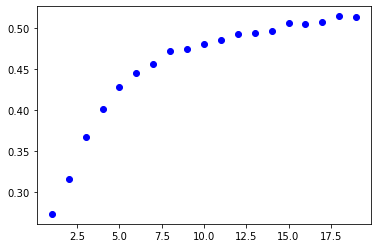

In [6]:
best_params_Ridge = {"score":0}
fig,ax = plt.subplots(1,1)
u = 0
for elem in scoring_by_n_features:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(f"Cross-validation set score: {elem['score']}")
    if elem["score"] > best_params_Ridge["score"]:
        best_params_Ridge["score"] = elem["score"]
        best_params_Ridge["features"] = elem["features"]
        best_params_Ridge["alpha"] = elem["alpha"]
        best_params_Ridge["support"] = elem["support"]
    ax.plot(len(elem["features"]),elem["score"],'bo')
print("Best score over all: " + str(best_params_Ridge["score"]))
print("Features: " + str(best_params_Ridge["features"]))
ridge = RidgeClassifier(alpha=best_params_Ridge['alpha'])
ridge.fit(X_train[:,best_params_Ridge["support"]],y_train)

###Accuracy on test set
y_pred = ridge.predict(X_test[:,best_params_Ridge["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")

In [7]:
import pandas as pd
df = pd.DataFrame.from_dict(scoring_by_n_features)
df.to_csv('Trained_stuff_Ridge/'+'Ridge_Complete.csv', sep='\t',index=False, header=True)


Best score over all: 0.8513513513513514
Features: ['location' 'var_dopp' 'SPC_Hi' 'SPD' 'MDR' 'strength' 'SPC_Lo'
 'peak_count' 'std_deviation' 'correlation' 'SPC_Mi'
 'Lo_skewness_variation' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength' 'SPC_Mi_variance' 'Range_profile']
Final score: 0.868231046931408


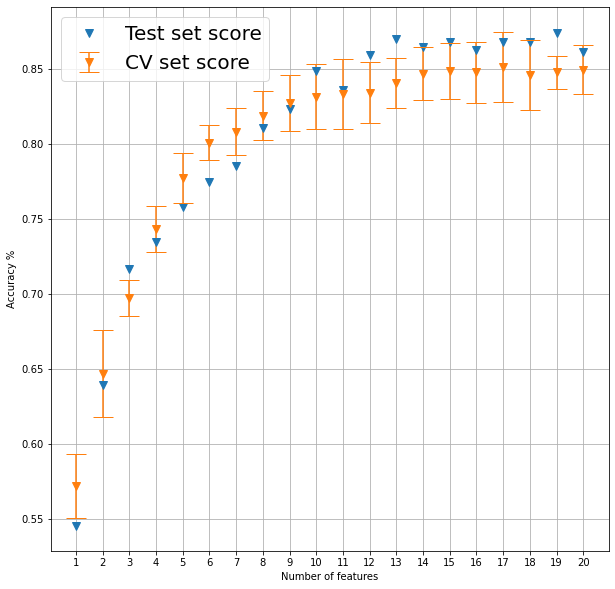

In [9]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel("Number of features")
ax.set_ylabel("Accuracy %")
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=8,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='CV set score',marker='v',markersize=8,linestyle='none',capsize=10)
ax.legend(fontsize=20)
ax.set_xticks(features_number)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")

In [10]:
filename = 'diagonal_model.model'
clf.save_model(filename)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (9).

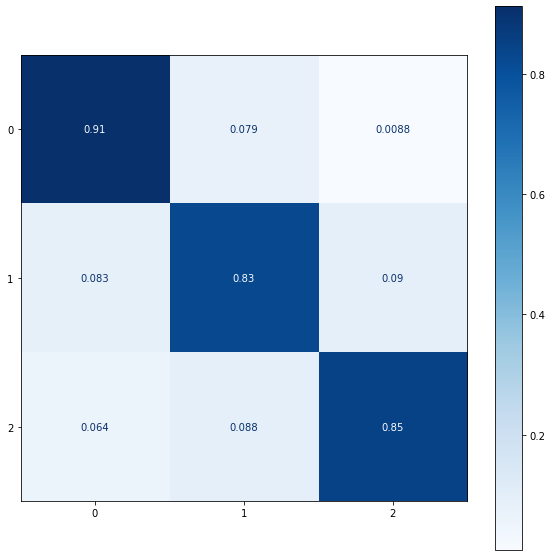

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
class_names = ['walking\nboresight','biking\nboresight','driving\nboresight',\
               'walking\ndiagonal','biking\ndiagonal','driving\ndiagonal',\
              'walking\nazimuth','biking\nazimuth','driving\nazimuth']
disp = plot_confusion_matrix(clf,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)
print(sum(y_test==2))

<ipython-input-12-dce64cd0750e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-12-dce64cd0750e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


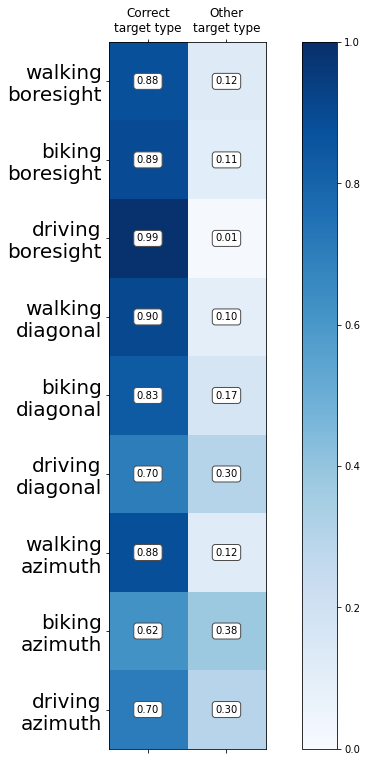

In [12]:
import matplotlib as mpl
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


<class 'xgboost.sklearn.XGBClassifier'>


XGBoostError: [09:41:34] /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1183: Check failed: learner_model_param_.num_feature >= p_fmat->Info().num_col_ (19 vs. 20) : Number of columns does not match number of features in booster.
Stack trace:
  [bt] (0) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x9f738) [0x14aacbb6f738]
  [bt] (1) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x1c7711) [0x14aacbc97711]
  [bt] (2) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(+0x1d1fa4) [0x14aacbca1fa4]
  [bt] (3) /home/coppolr/Desktop/Classification-Radar/env/lib/libxgboost.so(XGBoosterPredict+0xe7) [0x14aacbb75457]
  [bt] (4) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x14ab04bf49dd]
  [bt] (5) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x14ab04bf4067]
  [bt] (6) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x10da8) [0x14ab04c0ada8]
  [bt] (7) /home/coppolr/Desktop/Classification-Radar/env/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1108c) [0x14ab04c0b08c]
  [bt] (8) /home/coppolr/Desktop/Classification-Radar/env/bin/python(_PyObject_MakeTpCall+0x22f) [0x562991b6285f]



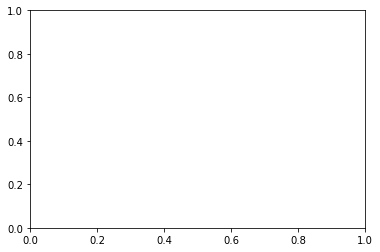

In [13]:
fig,ax = plt.subplots(1,1)
bst = xgb.XGBClassifier()  # init model
bst.load_model('Trained_stuff/'+filename)  # load data
print(type(bst))
y_pred = bst.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
disp = plot_confusion_matrix(bst,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)

<ipython-input-25-f082db3982ab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-25-f082db3982ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


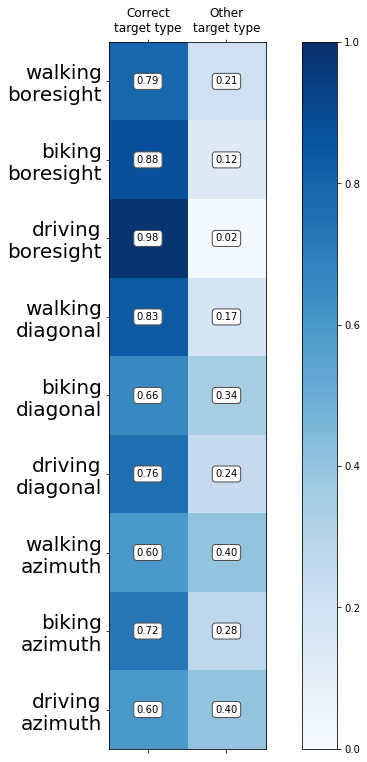

In [25]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


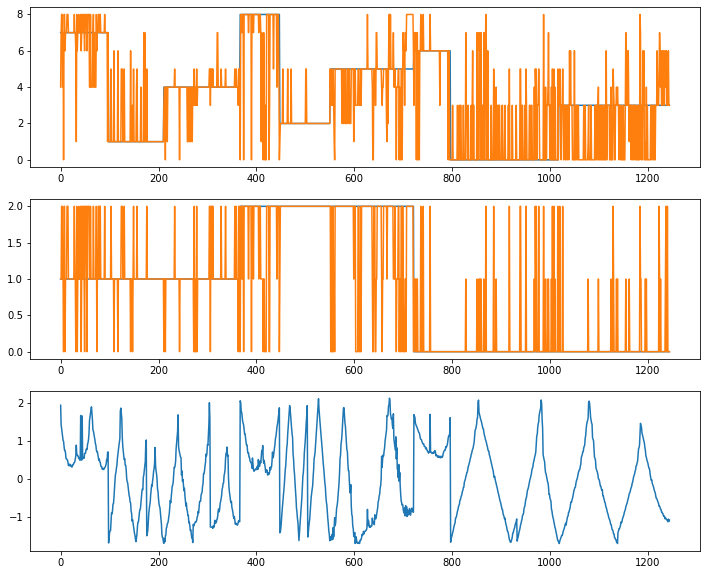

In [14]:
fig,ax = plt.subplots(3,1,figsize=[12,10])
ax[0].plot(y_test)
predictions = clf.predict(X_test[:,overall_best_params_xgb["support"]])
ax[0].plot(predictions)
y_test_converted = []
for y in y_test:
    if y == 0 or y == 3 or y == 6:
        y_test_converted.append(0)
    elif y == 1 or y == 4 or y == 7:
        y_test_converted.append(1)
    elif y == 2 or y == 5 or y == 8:
        y_test_converted.append(2)
        
predictions_converted = []
for pred in predictions:
    if pred == 0 or pred == 3 or pred == 6:
        predictions_converted.append(0)
    elif pred == 1 or pred == 4 or pred == 7:
        predictions_converted.append(1)
    elif pred == 2 or pred == 5 or pred == 8:
        predictions_converted.append(2)
    else:
        (print(pred))

ax[1].plot(y_test_converted)
ax[1].plot(predictions_converted)
ax[2].plot(X_test[:,0])

In [15]:
print(len(predictions_converted))

1245


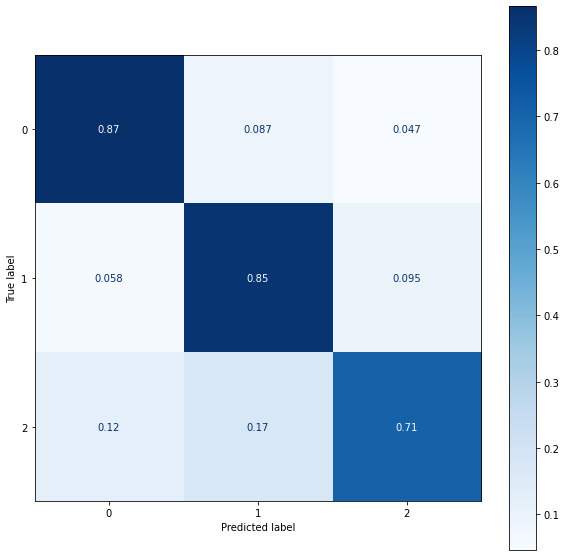

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
class_names = ['walkig\nboresight','biking\nboresight','driving\nboresight','walking\ndiagonal','biking\ndiagonal','driving\ndiagonal']
cm = metrics.confusion_matrix(y_test_converted,predictions_converted,normalize='true')
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues,ax=ax)

   Feature  Importance                    Name
0       f5         579                strength
1      f16         462           Range_profile
2       f0         460                location
3       f9         395             correlation
4      f10         372                  SPC_Mi
5      f14         367      Side_lobe_strength
6      f12         315  Mi_skewness_difference
7       f4         271                     MDR
8       f8         261           std_deviation
9      f13         260  Hi_skewness_difference
10      f1         245                var_dopp
11      f6         243                  SPC_Lo
12     f15         242         SPC_Mi_variance
13     f11         230   Lo_skewness_variation
14      f2         207                  SPC_Hi
15      f3         195                     SPD
16      f7          94              peak_count


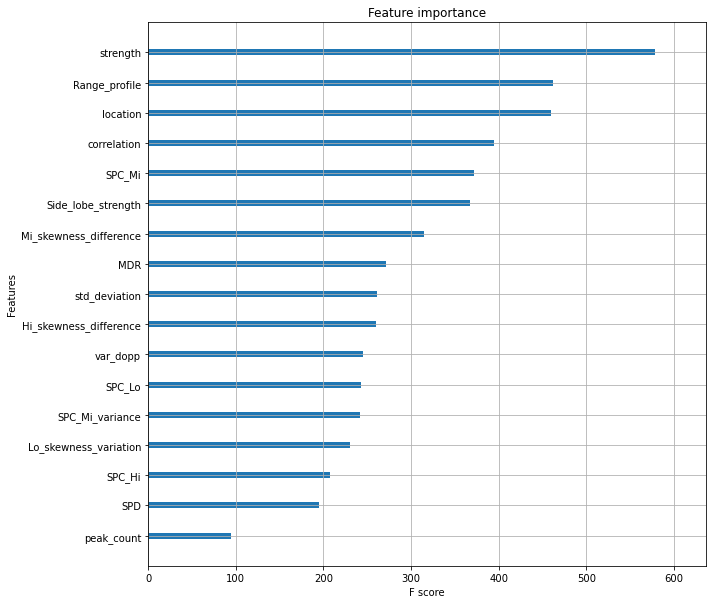

In [12]:
importance_type='weight'
fscores = clf.get_booster().get_score(importance_type=importance_type)
feat_importances = []

for ft, score in fscores.items():
    feat_importances.append({'Feature': ft, 'Importance': score, 'Name': overall_best_params_xgb["features"][int(ft[1:])]})
feat_importances = pd.DataFrame(feat_importances)
feat_importances = feat_importances.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)
print(feat_importances)
feat_labels = []
for elem in feat_importances.values:
    feat_labels.append(elem[2])
feat_labels = np.flip(feat_labels)
fig,ax = plt.subplots(1,1,figsize=(10,10))
_=plot_importance(clf,ax=ax,importance_type=importance_type,show_values=False).set_yticklabels(feat_labels)

In [16]:
import pandas as pd
df = pd.DataFrame.from_dict(best_params_xgb)
df.to_csv('Boresight_Diagonal_Azimuth.csv', sep='\t',index=False, header=True)

# Load model

In [37]:
asd = pd.read_csv("Trained_stuff/Boresight_Diagonal_azimuth.csv",delimiter='\t')
d = asd.to_dict("split")

my_dictionary_list = []
for row_idx in range(len(d['data'])):
    for col_idx in range(len(d['columns'])):
        if d['columns'][col_idx] == 'support':
            split_bools = d['data'][row_idx][col_idx] = d['data'][row_idx][col_idx].replace("\n", "").replace("  "," ").replace("[","").replace("]","").split(" ")
            d['data'][row_idx][col_idx] = []
            for elem in split_bools:
                if elem == 'True':
                    d['data'][row_idx][col_idx].append(True)
                elif elem == 'False':
                    d['data'][row_idx][col_idx].append(False)
    best_params= dict(zip(d["columns"],d["data"][row_idx]))
    best_params[d['columns'][col_idx]] = d['data']
    my_dictionary_list.append(best_params)

In [38]:
overall_best_params_xgb = {'score':0}
standard_deviation = []
test_scores = []
cv_scores = []
u = 0
for elem in my_dictionary_list:
    u += 1
    print(f"Number of features: {u}")
    print(elem["features"])
    print(f"Cross-validation set score: {elem['score']}")
    if elem["score"] > overall_best_params_xgb["score"]:
        overall_best_params_xgb["score"] = elem["score"]
        overall_best_params_xgb["features"] = elem["features"]
        overall_best_params_xgb["max_depth"] = elem["max_depth"]
        overall_best_params_xgb["gamma"] = elem["gamma"]
        overall_best_params_xgb["eta"] = elem["eta"]
        overall_best_params_xgb["support"] = elem["support"]
    clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=elem['eta'],gamma=elem['gamma'],max_depth=elem['max_depth'],use_label_encoder=False)
    clf.fit(X_train[:,elem["support"]],y_train)
    y_pred = clf.predict(X_test[:,elem["support"]])
    score = metrics.accuracy_score(y_test, y_pred)
    standard_deviation.append(elem['standard_deviation'])
    test_scores.append(score)
    cv_scores.append(elem["score"])
 

Number of features: 1
['Mi_skewness_difference']
Cross-validation set score: 0.3267159960093116
Number of features: 2
['Mi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.392991020951114
Number of features: 3
['Mi_skewness_difference' 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.4365626870635184
Number of features: 4
['SPC_Mi' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.491488526770868
Number of features: 5
['location' 'SPC_Mi' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength']
Cross-validation set score: 0.5827712005320917
Number of features: 6
['location' 'strength' 'SPC_Mi' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set score: 0.641315264383106
Number of features: 7
['location' 'var_dopp' 'strength' 'SPC_Mi' 'Mi_skewness_difference'
 'Hi_skewness_difference' 'Side_lobe_strength']
Cross-validation set 


Best score over all: 0.7264023944130362
Features: ['location' 'var_dopp' 'SPC_Hi' 'strength' 'max_dev' 'SPC_Lo'
 'std_deviation' 'harmonic_power_content' 'correlation'
 'max_to_mean_distance' 'Lo_peak_count' 'SPC_Mi' 'Hi_deviation'
 'Mi_peak_count' 'Mi_skewness_difference' 'Hi_skewness_difference'
 'Side_lobe_strength' 'Side_lobe_max_strength' 'SPC_Mi_variance']
Final score: 0.6305220883534136


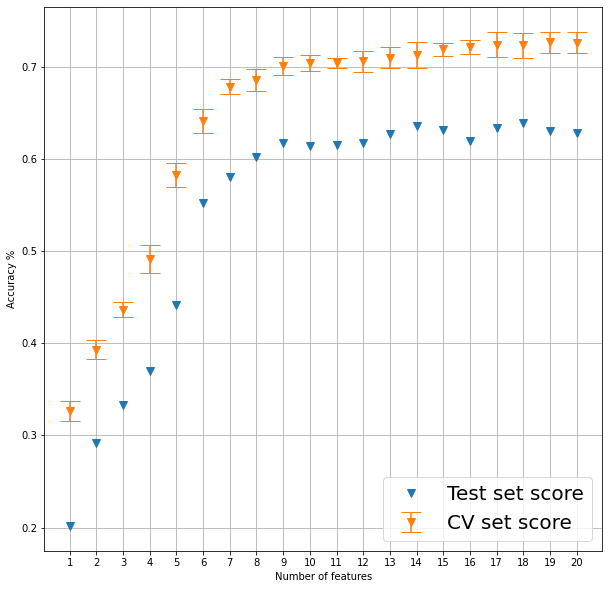

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel("Number of features")
ax.set_ylabel("Accuracy %")
features_number = np.arange(1,max_features+1)
ax.plot(features_number,test_scores, label='Test set score',marker='v',markersize=8,linestyle='none')
ax.errorbar(features_number,cv_scores, yerr=standard_deviation,label='CV set score',marker='v',markersize=8,linestyle='none',capsize=10)
ax.legend(fontsize=20)
ax.set_xticks(features_number)
ax.grid(True)
print()
print("Best score over all: " + str(overall_best_params_xgb["score"]))
print("Features: " + str(overall_best_params_xgb["features"]))
clf = xgb.XGBClassifier(objective='multi:softmax',eval_metric='rmsle',eta=overall_best_params_xgb['eta'],gamma=overall_best_params_xgb['gamma'],max_depth=overall_best_params_xgb['max_depth'],use_label_encoder=False)
clf.fit(X_train[:,overall_best_params_xgb["support"]],y_train)

###Accuracy on test set
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(f"Final score: {score}")

0.6305220883534136


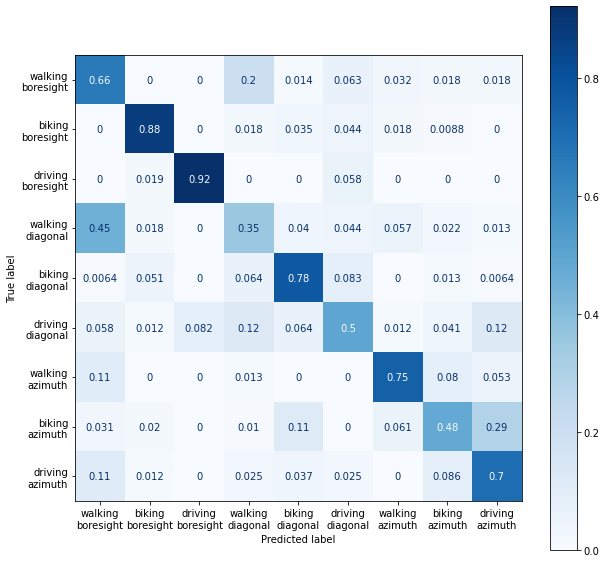

In [40]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
y_pred = clf.predict(X_test[:,overall_best_params_xgb["support"]])
score = metrics.accuracy_score(y_test, y_pred)
print(score)
disp = plot_confusion_matrix(clf,X_test[:,overall_best_params_xgb["support"]],y_test,cmap=plt.cm.Blues,normalize='true',display_labels=class_names, ax=ax)

<ipython-input-36-f082db3982ab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
<ipython-input-36-f082db3982ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_yticklabels(['']+class_names,fontsize=20)


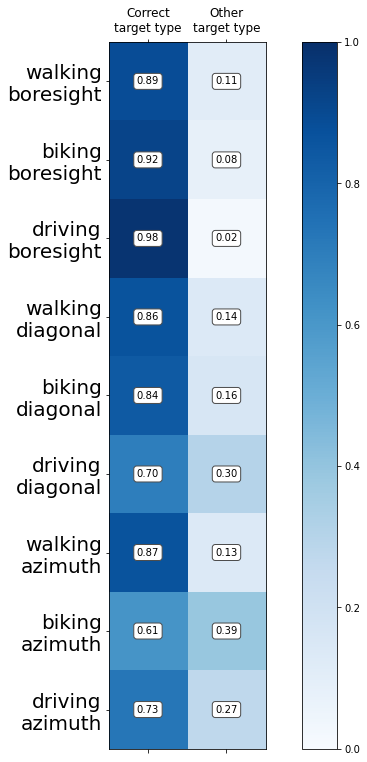

In [36]:
ConfusionMatrix = metrics.confusion_matrix(y_test,y_pred, normalize='true')
confusion_results = [[0, 0] for i in range(len(ConfusionMatrix))]
for diag in range(len(ConfusionMatrix)):
    rolled_row = np.roll(ConfusionMatrix[diag],-diag)
    for column in range(len(ConfusionMatrix)):
        confusion_results[diag][int(column%3 != 0)] += rolled_row[column]
fig,ax = plt.subplots(1,1,figsize=(13,13))
cax = ax.matshow(confusion_results, interpolation='nearest',cmap=plt.cm.Blues,norm=mpl.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(cax)

_=ax.set_xticklabels(['']+['Correct\ntarget type','Other\ntarget type'],fontsize=12)
_=ax.set_yticklabels(['']+class_names,fontsize=20)
for (i, j), z in np.ndenumerate(confusion_results):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
